## Dataset Import and Preprocessing

In [3]:
import pickle
import tensorflow as tf
from PreProcessing import pickle_To_Image, setGrayAndNormalise
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import Adam


from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation

In [4]:
# Import Train and Validation Sets
train_x = pickle_To_Image('./Pickled Files/train_split_x.pkl')
train_y = pickle_To_Image('./Pickled Files/train_split_y.pkl')
val_x = pickle_To_Image('./Pickled Files/val_split_x.pkl')
val_y = pickle_To_Image('./Pickled Files/val_split_y.pkl')

dataset has been imported :)
dataset has been imported :)
dataset has been imported :)
dataset has been imported :)


In [5]:
# Preprocess Images
train_x_processed_rgb2gray = np.array([setGrayAndNormalise(img) for img in train_x])
val_x_processed_rgb2gray = np.array([setGrayAndNormalise(img) for img in val_x])

In [6]:
# one hot encode train and validation labels
y_train = to_categorical(train_y, 43)
y_val = to_categorical(val_y, 43)

In [7]:
# reshape processed train_x and val_x to match the input shape of the model
train_x_processed_rgb2gray= np.reshape(train_x_processed_rgb2gray, (
train_x_processed_rgb2gray.shape[0], train_x_processed_rgb2gray.shape[1], train_x_processed_rgb2gray.shape[2],1))

val_x_processed_rgb2gray = np.reshape(val_x_processed_rgb2gray, (
val_x_processed_rgb2gray.shape[0], val_x_processed_rgb2gray.shape[1], val_x_processed_rgb2gray.shape[2],1))


train_x_processed_rgb2gray.shape
val_x_processed_rgb2gray.shape

(2580, 32, 32, 1)

## Create Model With Keras Preprocessing Layers

In [11]:
# define function for custom model
    
# Create a model template from greyscale images and 43 classes
model= Sequential()

RandomRotation(0.2),
RandomFlip("horizontal"),

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu',input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))


model.add(Flatten())
model.add(Dense(43, activation='softmax'))

# Compile model using the arguments
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),  metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [12]:
# Declare training parameters
epochs = 10
batch_size =32

# Train Model
history = model.fit(train_x_processed_rgb2gray, y_train, batch_size= batch_size, epochs=epochs,
                   validation_data= (val_x_processed_rgb2gray, y_val))

Epoch 1/10
1145/1145 [==============================] - 11s 9ms/step - loss: 1.8001 - accuracy: 0.4943 - val_loss: 0.8542 - val_accuracy: 0.7512
Epoch 2/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.5716 - accuracy: 0.8211 - val_loss: 0.5976 - val_accuracy: 0.8329
Epoch 3/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.3853 - accuracy: 0.8785 - val_loss: 0.4631 - val_accuracy: 0.8787
Epoch 4/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.3043 - accuracy: 0.9014 - val_loss: 0.3776 - val_accuracy: 0.9039
Epoch 5/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.2650 - accuracy: 0.9150 - val_loss: 0.3169 - val_accuracy: 0.9070
Epoch 6/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.2319 - accuracy: 0.9260 - val_loss: 0.3686 - val_accuracy: 0.9043
Epoch 7/10
1145/1145 [==============================] - 10s 9ms/step - loss: 0.2121 - accuracy: 0.9326 - val_loss: 0.3324 - val_ac

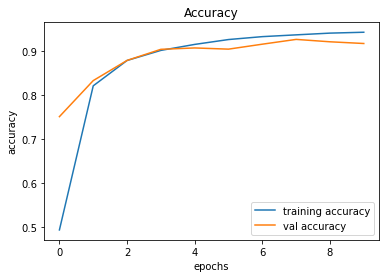

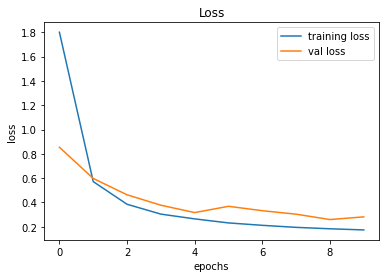

In [14]:
# Display Accuracy and Loss values of Training and Validation data

import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [15]:
model.save("CNN_version4_data_aug.h5")